In [2]:
import csv
from statistics import mean 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import spearmanr, pearsonr
from sklearn.ensemble import RandomForestRegressor


In [3]:
november = pd.read_csv("C:\\Users\spanddhana\\Desktop\\AIR_POLLUTION\\IIIT-AIRVEDA CALIBERATION\\nov_final.csv")

In [4]:
november

,Unnamed: 0,timestamp,PM2.5,PM10,NO2,CO,Ozone,Temp,RH,pm25_air,pm10_air,co_air,no2_air
0,1,01-11-2020 01:00,74.75,168.50,39.92,0.53,61.38,29.40,62.50,79.5,123.0,2.0,50.405
1,2,01-11-2020 02:00,76.75,151.50,37.65,0.48,57.85,29.42,65.00,79.5,119.0,2.0,49.660
2,3,01-11-2020 03:00,67.50,132.25,36.92,0.46,52.95,29.47,67.50,82.0,120.0,2.0,49.335
3,4,01-11-2020 04:00,69.50,137.75,36.98,0.45,52.25,29.80,68.00,81.5,123.5,2.0,46.320
4,5,01-11-2020 05:00,72.00,147.25,35.65,0.56,42.98,29.38,72.25,87.0,124.5,2.0,44.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,792,30-11-2020 19:00,31.00,80.25,31.12,0.53,38.52,29.20,74.00,51.5,89.5,2.0,49.525
792,793,30-11-2020 20:00,49.00,104.00,76.92,1.25,4.45,29.20,73.75,62.5,117.0,2.0,51.705
793,794,30-11-2020 21:00,83.50,172.75,92.80,1.90,1.25,29.25,71.25,83.5,142.5,2.0,52.935
794,795,30-11-2020 22:00,80.25,176.00,91.62,2.00,2.40,29.30,73.50,94.5,156.0,2.5,52.200


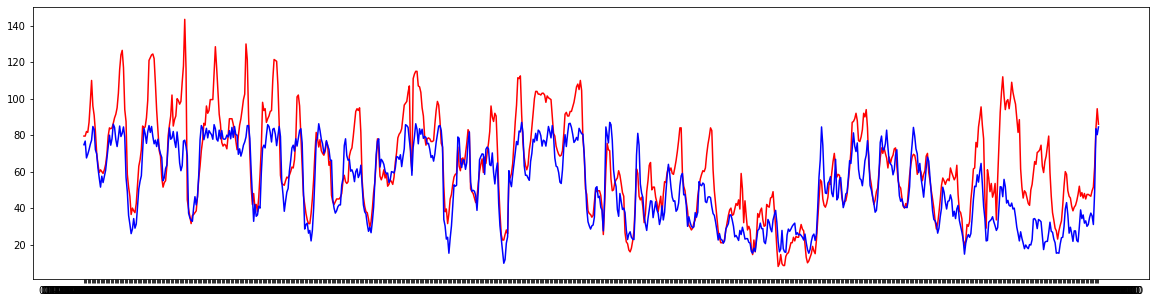

In [4]:
x = november['timestamp']
y1 = november['pm25_air']
y2 = november['PM2.5']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y1, 'r') 
plt.plot(x, y2, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["Airveda","CPCB"])
plt.title('PM2.5 airveda and CPCB')
plt.show()


max correlation is at lag 0
max correlation is  0.8
Pearsons correlation: 0.801
MSE:  334.4525753768844
MAE:  13.329145728643216
RMSE  18.288044602331993


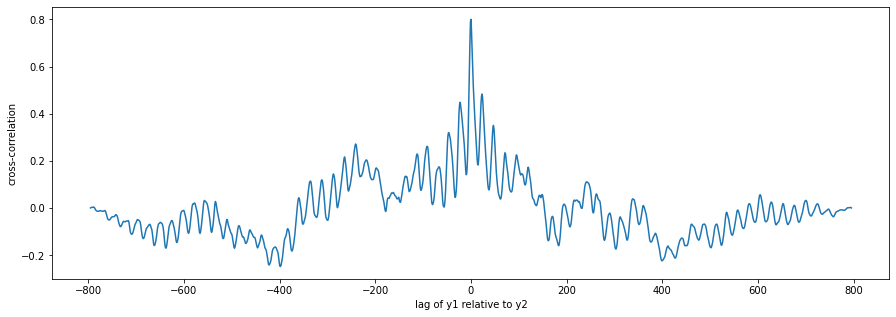

In [12]:
npts = len(november)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y1 - y1.mean(), y2 - y2.mean(), mode='full')
ccor = ccov / (npts * y1.std() * y2.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y1 relative to y2')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y1, y2) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(november['pm25_air'], november['PM2.5'])
MAE = mean_absolute_error(november['pm25_air'], november['PM2.5'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(november['pm25_air'], november['PM2.5'])))

In [13]:
november = november[november['pm25_air'] < 100]

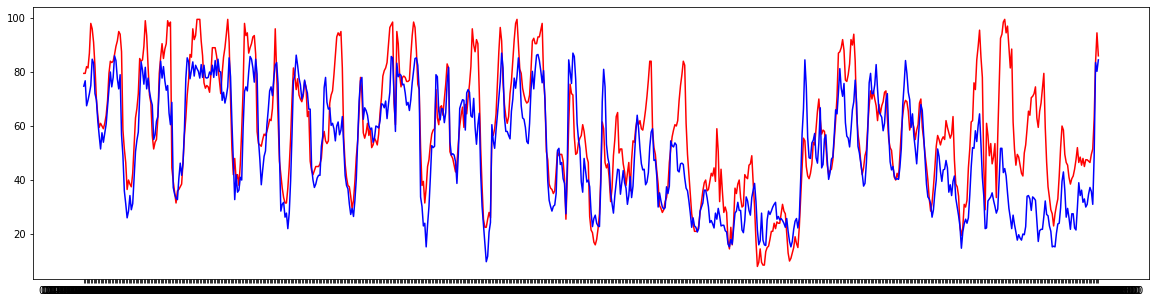

In [14]:
x = november['timestamp']
y1 = november['pm25_air']
y2 = november['PM2.5']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y1, 'r') 
plt.plot(x, y2, 'b') 
plt.show()

max correlation is at lag 0
max correlation is  0.798
Pearsons correlation: 0.799
MSE:  239.47231774415405
MAE:  11.336313617606603
RMSE  15.474893141606957


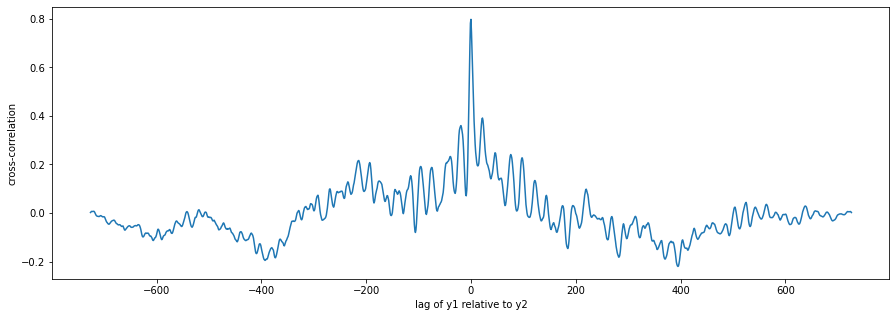

In [15]:
npts = len(november)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y1 - y1.mean(), y2 - y2.mean(), mode='full')
ccor = ccov / (npts * y1.std() * y2.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y1 relative to y2')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y1, y2) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(november['pm25_air'], november['PM2.5'])
MAE = mean_absolute_error(november['pm25_air'], november['PM2.5'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(november['pm25_air'], november['PM2.5'])))

In [16]:
msk = (np.random.rand(len(november)) > 0.8)
train = november[msk]
test = november[~msk]
regr = linear_model.LinearRegression()
train_t = np.asanyarray(train[['timestamp']])
train_x = np.asanyarray(train[['pm25_air']])
train_y = np.asanyarray(train[['PM2.5']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
test_t = np.asanyarray(test[['timestamp']])
test_x = np.asanyarray(test[['pm25_air']])
test_y = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y, test_y_hat)) 

Coefficients:  [[0.83069292]]
Intercept:  [4.01150719]
R2  0.6188604534009623
MAE  9.416695860327218
MSE  162.7653394105808
RMSE  12.757952006908507
variance score = 0.6311730245071728


In [19]:
train_t = np.asanyarray(train[['timestamp']])
train_x = np.asanyarray(train[['pm25_air', 'Temp']])
train_y = np.asanyarray(train[['PM2.5']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
test_t = np.asanyarray(test[['timestamp']])
test_x = np.asanyarray(test[['pm25_air', 'Temp']])
test_y = np.asanyarray(test[['PM2.5']])
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y, test_y_hat)) 

Coefficients:  [[0.82879249 0.87360897]]
Intercept:  [-21.58028136]
R2  0.6201500693535469
MAE  9.401266107674838
MSE  162.21460994651767
RMSE  12.736349945982077
variance score = 0.6319718038525175


In [20]:
train_t = np.asanyarray(train[['timestamp']])
train_x = np.asanyarray(train[['pm25_air', 'RH']])
train_y = np.asanyarray(train[['PM2.5']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
test_t = np.asanyarray(test[['timestamp']])
test_x = np.asanyarray(test[['pm25_air', 'RH']])
test_y = np.asanyarray(test[['PM2.5']])
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y, test_y_hat)) 

Coefficients:  [[ 0.86715744 -0.40428554]]
Intercept:  [26.31709784]
R2  0.7236563402541752
MAE  8.160964164760266
MSE  118.01233950621689
RMSE  10.863348448163526
variance score = 0.729849503946518


In [22]:
train_t = np.asanyarray(train[['timestamp']])
train_x = np.asanyarray(train[['pm25_air', 'RH', 'Temp', 'Ozone']])
train_y = np.asanyarray(train[['PM2.5']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
test_t = np.asanyarray(test[['timestamp']])
test_x = np.asanyarray(test[['pm25_air', 'RH', 'Temp','Ozone']])
test_y = np.asanyarray(test[['PM2.5']])
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y, test_y_hat)) 

Coefficients:  [[ 0.89266934 -0.5461473  -5.49519766 -0.05193482]]
Intercept:  [197.91123551]
R2  0.7392166511153779
MAE  7.893450293909114
MSE  111.36732116252296
RMSE  10.553071645853777
variance score = 0.7474713134494009


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr

X = november['pm25_air']
y = november['PM2.5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0) 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(X.values.reshape(-1,1), y.values.reshape(-1,1)) 
y_pred = regressor.predict(X_test.values.reshape(-1,1))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

predicted_train = regressor.predict(X_train.values.reshape(-1,1))
predicted_test = regressor.predict(X_test.values.reshape(-1,1))
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

C:\Users\spanddhana\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


Mean Absolute Error: 8.050153918857388
Mean Squared Error: 125.57623150233648
Root Mean Squared Error: 11.206080113150025
Test data R-2 score: 0.718
Test data Spearman correlation: 0.831
Test data Pearson correlation: 0.849


In [6]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
X = november[['pm25_air', 'RH']]
y = november['PM2.5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0) 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(X.values.reshape(-1,2), y.values.reshape(-1,1)) 
y_pred = regressor.predict(X_test.values.reshape(-1,2))


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

predicted_train = regressor.predict(X_train)
predicted_test = regressor.predict(X_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

C:\Users\spanddhana\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


Mean Absolute Error: 2.689375
Mean Squared Error: 19.2606796875
Root Mean Squared Error: 4.388699088283452
Test data R-2 score: 0.957
Test data Spearman correlation: 0.969
Test data Pearson correlation: 0.978


In [7]:
X = november[['pm25_air', 'Temp']]
y = november['PM2.5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0) 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(X.values.reshape(-1,2), y.values.reshape(-1,1)) 
y_pred = regressor.predict(X_test.values.reshape(-1,2))


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

predicted_train = regressor.predict(X_train)
predicted_test = regressor.predict(X_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Mean Absolute Error: 3.8678444940476195
Mean Squared Error: 37.30788737329046
Root Mean Squared Error: 6.108018285278005
Test data R-2 score: 0.916
Test data Spearman correlation: 0.949
Test data Pearson correlation: 0.958


C:\Users\spanddhana\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


In [8]:
X = november[['pm25_air', 'RH', 'Temp']]
y = november['PM2.5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0) 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 


print(X.values.reshape(-1,3), y.values.reshape(-1,1))
# fit the regressor with x and y data 
regressor.fit(X.values.reshape(-1,3), y.values.reshape(-1,1)) 
y_pred = regressor.predict(X_test.values.reshape(-1,3))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

predicted_train = regressor.predict(X_train)
predicted_test = regressor.predict(X_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

[[79.5  62.5  29.4 ]
 [79.5  65.   29.42]
 [82.   67.5  29.47]
 ...
 [83.5  71.25 29.25]
 [94.5  73.5  29.3 ]
 [86.   76.   29.33]] [[74.75]
 [76.75]
 [67.5 ]
 [69.5 ]
 [72.  ]
 [75.  ]
 [77.25]
 [84.75]
 [83.25]
 [72.  ]
 [69.75]
 [62.  ]
 [56.5 ]
 [51.5 ]
 [57.5 ]
 [54.  ]
 [57.5 ]
 [60.75]
 [67.25]
 [73.75]
 [80.  ]
 [74.5 ]
 [78.  ]
 [86.  ]
 [84.25]
 [77.5 ]
 [73.75]
 [78.75]
 [85.  ]
 [79.25]
 [81.  ]
 [84.5 ]
 [79.  ]
 [56.75]
 [49.  ]
 [36.  ]
 [31.25]
 [26.  ]
 [28.5 ]
 [34.25]
 [29.  ]
 [31.25]
 [40.75]
 [50.5 ]
 [54.75]
 [57.75]
 [71.5 ]
 [83.75]
 [80.75]
 [75.5 ]
 [81.75]
 [85.25]
 [81.5 ]
 [84.75]
 [79.25]
 [75.25]
 [77.25]
 [73.75]
 [77.75]
 [72.75]
 [69.75]
 [67.75]
 [55.  ]
 [56.75]
 [61.75]
 [63.5 ]
 [74.75]
 [84.  ]
 [77.75]
 [78.5 ]
 [82.  ]
 [76.75]
 [73.25]
 [81.75]
 [75.  ]
 [64.75]
 [60.5 ]
 [63.25]
 [76.75]
 [77.25]
 [73.75]
 [68.75]
 [37.25]
 [34.75]
 [33.25]
 [32.75]
 [40.5 ]
 [46.25]
 [41.75]
 [46.25]
 [58.5 ]
 [77.5 ]
 [85.25]
 [83.75]
 [77.5 ]
 [80.75]
 [83

C:\Users\spanddhana\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
